In [4]:
from base_functions import node, element_linear, element_nonlinear, system_from_mdpa

filename = "./Example_mdpas/E8.mdpa"
fix_mps = {
    "all": ["fixAll"],
    "x" : [],
    "y" : [],
    "z" : ["fixZ"]
}

mp_sv = {
    "claw": "StVenant",
    "YoungsModulus" : 1000000.0
}

mp_nh = {
    "claw": "NeoHookean",
    "YoungsModulus" : 1000000.0
}

mp_og = {
    "claw": "Ogden",
    "YoungsModulus" : 1000000.0,
    "ogden_betas" : [10,0]
}

s_sv = system_from_mdpa(filename, fix_mps, material_parameters=mp_sv, cross_area=0.01,linear_system=False)
s_nh = system_from_mdpa(filename, fix_mps, material_parameters=mp_nh, cross_area=0.01,linear_system=False)
s_og = system_from_mdpa(filename, fix_mps, material_parameters=mp_og, cross_area=0.01,linear_system=False)


for s in [s_sv,s_nh,s_og]:
    s.find_node(4,s.nodes).force[1] = 2000.0
    s.find_node(4,s.nodes).force[0] = 0.0

In [5]:
# solving St Venant trusses
s_sv.solve_inverse_problem()

# solving Neo Hookean trusses
s_nh.solve_inverse_problem()

# solving Ogden trusses
s_og.solve_inverse_problem()

 >> starting to solve inverse problem
disp residual:  1.139154e+00   |   force residual:  2.000000e+03
disp residual:  1.785170e-01   |   force residual:  1.721607e+03
disp residual:  5.595545e-02   |   force residual:  4.290844e+02
disp residual:  3.610960e-03   |   force residual:  1.648429e+01
disp residual:  8.658077e-06   |   force residual:  2.187475e-02
disp residual:  2.522938e-11   |   force residual:  5.855985e-08
disp residual:  6.706167e-16   |   force residual:  6.725804e-12
 >> inverse problem solved
 >> starting to solve inverse problem
disp residual:  1.139154e+00   |   force residual:  2.000000e+03
disp residual:  1.814817e-01   |   force residual:  2.578900e+03
disp residual:  1.062745e-02   |   force residual:  1.266053e+02
disp residual:  4.130585e-05   |   force residual:  9.426138e-02
disp residual:  3.829989e-10   |   force residual:  6.379879e-06
disp residual:  8.084003e-16   |   force residual:  2.356089e-12
 >> inverse problem solved
 >> starting to solve inv

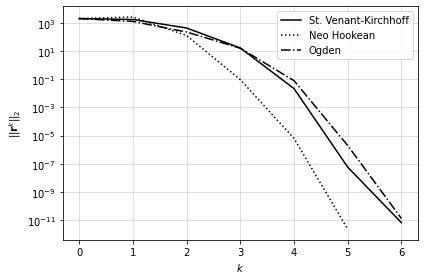

In [6]:
s_sv.plot_convergence(label_text="St. Venant-Kirchhoff")
s_nh.plot_convergence(label_text="Neo Hookean")
s_og.plot_convergence(label_text="Ogden")
s_sv.show_plot()
#s_sv.save_plot_pdf("convergence_plot")

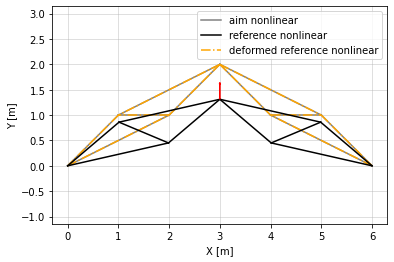

In [7]:
s_sv.plot2d(["aim","ref","extra"],scale_force=0.05,scale_arrow=0.5,print_lvl=0,proj="z")
s_sv.show_plot()

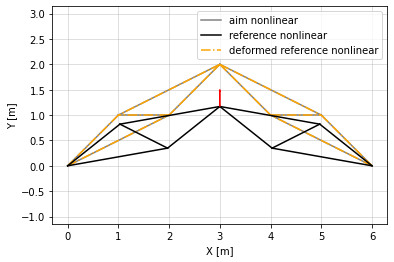

In [8]:
s_nh.plot2d(["aim","ref","extra"],scale_force=0.05,scale_arrow=0.5,print_lvl=0,proj="z")
s_nh.show_plot()

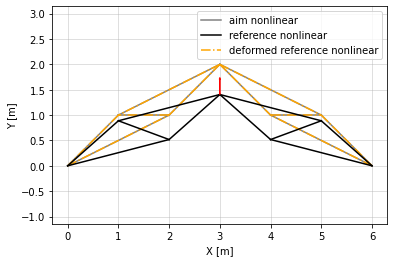

In [9]:
s_og.plot2d(["aim","ref","extra"],scale_force=0.05,scale_arrow=0.5,print_lvl=0,proj="z")
s_og.show_plot()

In [10]:
print("sv: ",s_sv.find_node(4,s_sv.nodes).y)
print("nh: ",s_nh.find_node(4,s_nh.nodes).y)
print("og: ",s_og.find_node(4,s_og.nodes).y)

sv:  1.3113434128165868
nh:  1.1695200737384488
og:  1.4055031762269383
